In [1]:
import pandas as pd

### Воспользуемся датасетом про Титаник. 

In [5]:
df = pd.read_csv('titanic.csv', index_col='PassengerId')

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Количество уникальных значений в коллонках типа object.

In [9]:
for col in df.select_dtypes('object'):
    print(col, df[col].nunique())

Name 891
Sex 2
Ticket 681
Cabin 147
Embarked 3


Среди данных колонок можно выделить явно категориальные 'Sex' и 'Embarket'. Оствим их, а остальные удалим. 'Name' и 'Ticket' фактически уникальные значения каждого пассажира, а в 'Cabin' очень много пропущенных значений. 

In [11]:
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


### Количество пропущенных значений по столбцам.

In [18]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### В полученном датафрэйме есть числовые и категориальные данные('Sex', 'Embarked'), а в столбцах 'Age' и 'Embarket' есть пропущенные значения.

### 1. Обработка пропущенных значений.

В столбце всего два пропущенных значения. Их можно заменить на самый часто встречающийся.

In [19]:
from sklearn.impute import SimpleImputer

In [25]:
imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer.fit_transform(df[['Embarked']])

Посмотрим на распределение значений "Age".

Age mean: 29.36158249158249
Age median: 28.0


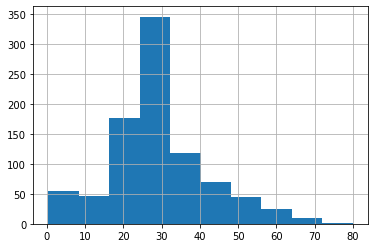

In [38]:
df['Age'].hist()
print('Age mean:', df.Age.mean())
print('Age median:', df.Age.median())

Заполним пропуски в Age на медианное значение.

In [35]:
df['Age'].fillna(df.Age.median(), inplace=True)

#### Пропущенные значения обработаны.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 102.6+ KB


### 2. Кодирование категориальных признаков.

В столбце Sex два значения, можно закодировать их нулями и единицами.

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

Столбец Embarked закодируем с помощью one-hot.

In [45]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [46]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,1
2,1,1,0,38.0,1,0,71.2833,0,0
3,1,3,0,26.0,0,0,7.9250,0,1
4,1,1,0,35.0,1,0,53.1000,0,1
5,0,3,1,35.0,0,0,8.0500,0,1


### 3. Масштабирование данных.

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

In [51]:
df_scaled.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,1.0
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,1.0
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,1.0
